In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


5


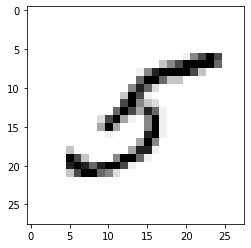

In [3]:
image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [4]:
print("x_train.shape "+str(x_train.shape))
print("x_test.shape "+str(x_test.shape))
print("y_train.shape "+str(y_train.shape))
print("y_test.shape "+str(y_test.shape))


x_train.shape (60000, 28, 28)
x_test.shape (10000, 28, 28)
y_train.shape (60000,)
y_test.shape (10000,)


In [5]:
# save input image dimensions
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train.shape "+str(x_train.shape))
print("x_test.shape "+str(x_test.shape))

x_train.shape (60000, 28, 28, 1)
x_test.shape (10000, 28, 28, 1)


In [0]:
num_classes = 10

# y_train = to_categorical(y_train, num_classes)
# y_test = to_categorical(y_test, num_classes)
# print("y_train.shape "+str(y_train.shape))
# print("y_test.shape "+str(y_test.shape))


# x_train = to_categorical(x_train, num_classes)
# x_test = to_categorical(x_test, num_classes)
# print("x_train.shape "+str(x_train.shape))
# print("x_test.shape "+str(x_test.shape))

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [9]:
batch_size = 128
epochs = 10

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.2421 - accuracy: 0.9254 - val_loss: 0.0583 - val_accuracy: 0.9820
Epoch 2/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0889 - accuracy: 0.9747 - val_loss: 0.0378 - val_accuracy: 0.9876
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0654 - accuracy: 0.9803 - val_loss: 0.0336 - val_accuracy: 0.9885
Epoch 4/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0548 - accuracy: 0.9834 - val_loss: 0.0282 - val_accuracy: 0.9906
Epoch 5/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0466 - accuracy: 0.9850 - val_loss: 0.0301 - val_accuracy: 0.9897
Epoch 6/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0399 - accuracy: 0.9874 - val_loss: 0.0335 - val_accuracy: 0.9892
Epoch 7/10
60000/60000 [==============================] - 5s 90us/